# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin.
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

In [ ]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Import library di sini
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics, ensemble, neighbors, tree, svm
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Ridge
from sklearn.inspection import permutation_importance
import seaborn as sb

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,F,9.0,6.0,8.0,False
1,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,M,13.0,6.0,8.0,False
2,1.0,0.0,29.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,20.0,5.0,0.0,F,12.0,6.0,8.0,False
3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,30.0,0.0,0.0,M,1.0,5.0,7.0,False
4,0.0,0.0,33.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,30.0,15.0,1.0,F,11.0,4.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,1.0,0.0,23.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,F,7.0,5.0,8.0,False
50732,1.0,1.0,23.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,M,9.0,6.0,8.0,True
50733,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,20.0,4.0,1.0,F,7.0,6.0,8.0,True
50734,0.0,0.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0,3.0,0.0,0.0,F,5.0,6.0,8.0,False


In [ ]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
# Encode data (train, test, validation)
lambda_bool_to_01 = lambda x: 1 if x == True else 0
y_train = y_train.apply(lambda_bool_to_01)
y_val = y_val.apply(lambda_bool_to_01)
y_test = y_test.apply(lambda_bool_to_01)
encoder = preprocessing.LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_val['Sex'] = encoder.transform(X_val['Sex'])
X_test['Sex'] = encoder.transform(X_test['Sex'])

## Baseline model

Accuracy: 0.8636184469846275
Precision: 0.5434782608695652
Recall: 0.14124293785310735
F1 score: 0.22421524663677128


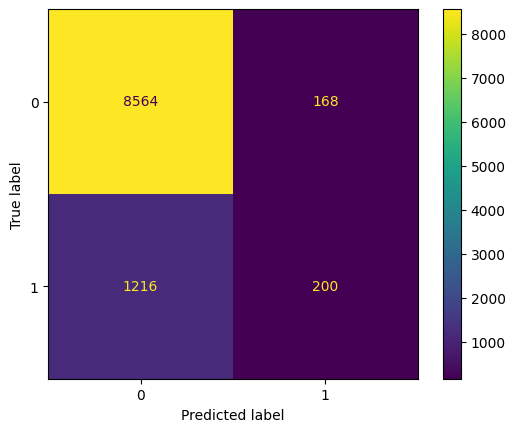

In [ ]:
model_baseline = LogisticRegression(max_iter = 1000) # Parameter hanya untuk menghilangkan warning
model_baseline.fit(X_train, y_train)

# Tidak ada validasi

y_pred = model_baseline.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')


metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_test, y_pred)
).plot()

## **Analisis Data**

### **Duplicate Value**

In [ ]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50731    False
50732    False
50733    False
50734     True
50735    False
Length: 50736, dtype: bool

In [ ]:
data.duplicated().sum()

2329

#### **Analisis**
Berdasarkan eksekusi kode di atas, terdapat 2.329 duplicated rows pada dataset (tidak termasuk first occurence)

#### **Rencana Penanganan Duplicate Value**
Rencana penanganan duplicate rows dari dataset tersebut adalah dengan menghapus semua duplicate rows yang ada dan mempertahankan kemunculan pertama saja untuk instance tersebut. Hal ini dilakukan untuk mencegah munculnya bias akibat duplikasi, namun masih tetap mempertahankan nilai unik yang dapat menambah knowledge dalam proses learning

### **Missing Value**

In [ ]:
data.isna().sum()

HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes                0
dtype: int64

#### **Analisis**
Berdasarkan eksekusi kode di atas, tidak terdapat missing value pada dataset

#### **Rencana Penanganan Missing Value**
Berdasarkan eksekusi kode di atas, tidak terdapat missing value pada dataset sehingga tidak diperlukan perlakukan khusus untuk menghandle missing value pada dataset ini

### **Outlier**

Outlier hanya dimiliki oleh non categorical variable saja.

In [ ]:
data.dtypes

HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                     float64
Education               float64
Income                  float64
Diabetes                   bool
dtype: object

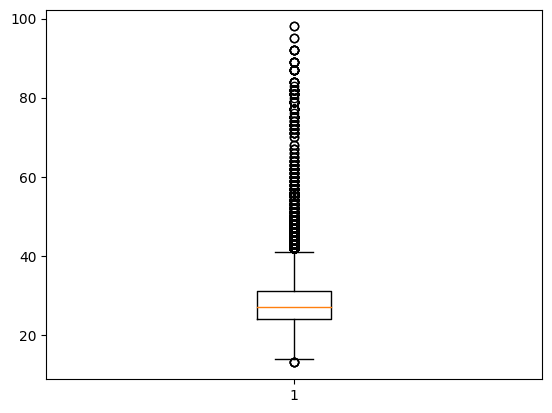

43268    13.0
25813    13.0
9505     13.0
40887    13.0
32784    42.0
         ... 
10604    92.0
45081    95.0
16255    95.0
7011     98.0
12737    98.0
Name: BMI, Length: 1979, dtype: float64


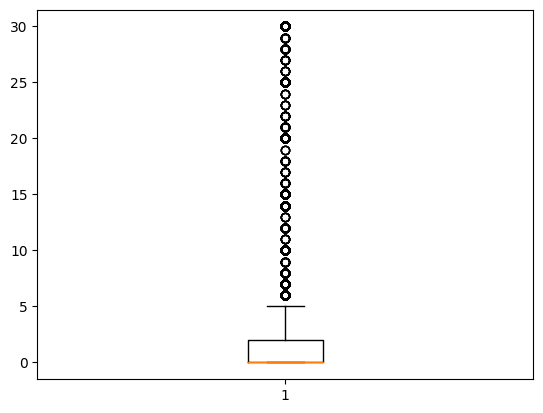

20337     6.0
29935     6.0
16064     6.0
38069     6.0
10130     6.0
         ... 
38905    30.0
14953    30.0
38911    30.0
38888    30.0
11772    30.0
Name: MentHlth, Length: 7308, dtype: float64


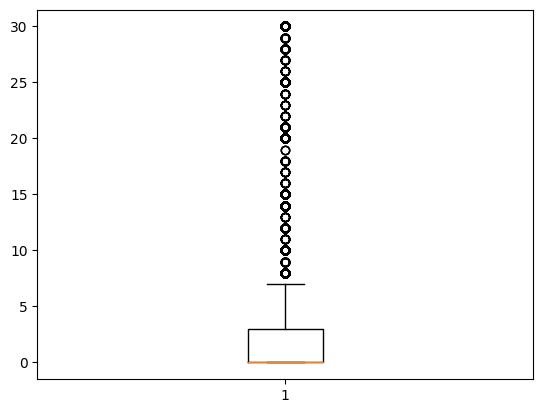

26222     8.0
45716     8.0
31318     8.0
21713     8.0
2353      8.0
         ... 
30456    30.0
30453    30.0
30450    30.0
9872     30.0
50726    30.0
Name: PhysHlth, Length: 8198, dtype: float64


In [ ]:
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
for col in numerical_features:
  plt.boxplot(data[col])
  plt.show()
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3-q1
  print(pd.concat([data[col][data[col] > (q3+1.5*IQR)], data[col][data[col] < (q1-1.5*IQR)]] ).sort_values())


#### **Analisis**
Berdasarkan data type dari setiap feature di atas, feature sex dan diabetes pasti merupakan categorical feature karena memiliki datatype non numerical. Feature HighBP, HighChol, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity	Fruits, Veggies, HvyAlcoholConsump, AnyHealthcareasuransi, GenHtlth, DiffWalk, Age, Education, Income, dan Diabetes merupakan categorical feature yang telah melalui proses label encoding sehingga nilainya direpresentasikan dalam bentuk numerik. Dengan demikian, non categorical feature yang bisa dideteksi outliernya adalah BMI, MentHlth, dan PhysHlth

#### **Rencana Penanganan Outlier**
Rencana penanganan outlier yang akan dilakukan adalah dengan melakukan teknik Winsorization pada data outlier tersebut. Winsorization merupakan teknik untuk mengganti extreme value dari statistikal data untuk mengurangi efek dari outlier pada proses learning data. Misalnya dengan teknik 90% winsorization, kita mengganti data dari top 5% dan bottom 5% dengan 95th percentile dan 5th percentile berturut-turut.

### **Balance of Data**

In [ ]:
data['Diabetes'].value_counts()

Diabetes
False    43790
True      6946
Name: count, dtype: int64

#### **Analisis**
Data diabetes merupakan *imbalanced dataset*, karena memiliki proporsi kelas *skewed*

#### **Rencana Penanganan Imbalanced Dataset**


Imbalanced dataset ditangani dengan mengubah *evaluation metric*, menggunakan *data level methods* dan *algorithm level methods*. 

*Evaluation metric* yang digunakan tidak hanya *accuracy* karena akan memberikan nilai besar jika prediksi selalu salah, namun juga recall, precision, dan F1-Score. 

Penanganan dengan *data level methods* dilakukan dengan *oversampling*, agar tidak membuang data untuk kelas False. 

Penanganan dengan *algorithm level methods* dilakukan dengan memberikan cost untuk *misclassification* tiap kelas, memindah threshold untuk mendapat *precision-recall tradeoff* yang baik, dan *ensemble classifier*.

## **Encoding**

In [ ]:
data.dtypes

HighBP                  float64
HighChol                float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                      object
Age                     float64
Education               float64
Income                  float64
Diabetes                   bool
dtype: object

Berdasarkan eksekusi kode di atas, terdapat 2 kolom yang masih bernilai non numerik, yaitu Sex (bertipe object) dan Diabetes (bertipe boolean). Perlu dilakukan encoding untuk feature-feature tersebut karena beberapa model machine learning mengharuskan input dan output dalam bentuk numerik.


In [ ]:
print(f"Unique value pada column Sex : {data['Sex'].unique()}")
print(f"Unique value pada column Diabetes: {data['Diabetes'].unique()}")

Unique value pada column Sex : ['F' 'M']
Unique value pada column Diabetes: [False  True]


Kolom Sex di atas memiliki 2 kemungkinan nilai yaitu F atau M. Nilai F dan M tidak memiliki ordinalitas tertentu yang menyatakan M > F ataupun F < M. Label Encoding biasanya digunakan pada feature ketika terdapat ordinalitas tertentu pada feature tersebut, sedangkan One Hot Encoding digunakan pada feature nominal. Akan tetapi, karena pada kolom sex hanya terdapat 2 kemungkinan nilai, yaitu F dan M yang mana jika diubah ke dalam Label Encoding akan menghasilkan 0 atau 1 untuk masing-masing F dan M, begitupun sebenarnya untuk One Hot Encoding . Akan tetapi pada one hot encoding diperlukan 2 kolom untuk masing-masing menyatan F dan M. Dengan pertimbangan dimensionalitas dan efektifitas, label encoding sudah cukup untuk merepresentasikan kolom Sex dengan baik


Kolom Diabetes memiliki 2 kemungkinan nilai yaitu True atau False dan diberlakukan Label Encoding dengan alasan yang serupa dengan kolom Sex di atas.

## Desain Eksperimen

### Tujuan Eksperimen

Eksperimen bertujuan untuk melakukan prediksi apakah seseorang pernah mengalami diabetes atau tidak, berdasar data kesehatan yang diberikan.

### Variabel dependen dan independen

Variabel dependen: Diabetes
Variabel independen: 
1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8

### Strategi Eksperimen

Strategi yang digunakan untuk eksperimen ini adalah *One Factor at A Time*. Baseline yang digunakan mengikuti baseline model. Faktor yang akan diubah termasuk, tetapi tidak terbatas pada
1. Penalty model logistic regression
2. Weight tiap fitur (balanced, default, custom)
3. Model atau gabungan model yang digunakan


### Skema Validasi

Skema validasi yang digunakan adalah *Hold-out Validation*. Dataset dibagi menjadi data latih, data validasi, dan data tes. Eksperimen dilakukan menggunakan data validasi, dan model terbaik yang dihasilkan diuji menggunakan data tes.

# Praktikum Machine Learning Bagian B

## Preprocessing

### Duplicate Values

In [ ]:
df_train.shape

(32470, 20)

In [ ]:
## Duplicated Rows
print(f"Duplicated rows: {df_train.duplicated().sum()}")

## Duplicated Independent Instances
print(f"Duplicated independent instances: {df_train.drop('Diabetes', axis = 1).duplicated().sum()}")


Duplicated rows: 1135
Duplicated independent instances: 1193


In [ ]:
# Drop duplicated rows (keep the first occurence)
df_train = df_train.drop_duplicates(keep = 'first')
print(f"Dataset dimension: {df_train.shape}")
# Drop rows with duplicated independent instances, excluding the 'Diabetes' column 
df_train =  df_train.drop_duplicates(subset=df_train.columns.difference(['Diabetes']))
print(f"Dataset dimension: {df_train.shape}")


Dataset dimension: (31335, 20)
Dataset dimension: (31277, 20)


### Outlier

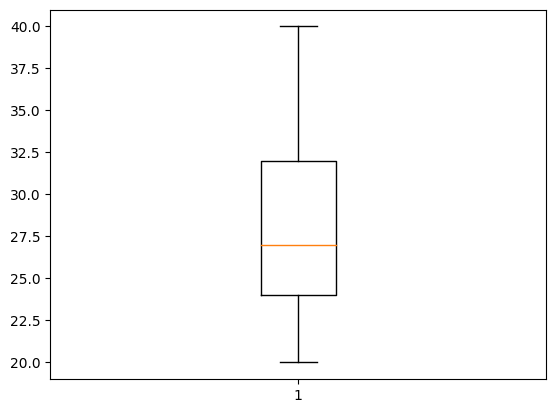

In [ ]:
# # BMI
df_train['BMI'] = winsorize(df_train['BMI'], limits = [0.05, 0.05])
plt.boxplot(df_train['BMI'])
plt.show()


### Encoding and Balance of Data

In [ ]:
X_train = df_train.drop(columns = 'Diabetes')
y_train = df_train["Diabetes"].copy()
X_train['Sex'] = encoder.transform(X_train['Sex'])
y_train = y_train.apply(lambda_bool_to_01)

In [ ]:
# Oversampling
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

Diabetes
0    26882
1    26882
Name: count, dtype: int64

### Correlation between Features

Training set correlation:
                        HighBP  HighChol       BMI    Smoker    Stroke  \
HighBP                1.000000  0.332862  0.268707  0.091126  0.139216   
HighChol              0.332862  1.000000  0.144857  0.102122  0.109654   
BMI                   0.268707  0.144857  1.000000  0.011672  0.033974   
Smoker                0.091126  0.102122  0.011672  1.000000  0.071091   
Stroke                0.139216  0.109654  0.033974  0.071091  1.000000   
HeartDiseaseorAttack  0.218273  0.187944  0.071861  0.133548  0.228433   
PhysActivity         -0.136538 -0.103256 -0.185561 -0.094708 -0.089703   
Fruits               -0.017869 -0.040002 -0.078613 -0.067690 -0.003420   
Veggies              -0.059006 -0.048912 -0.059857 -0.023733 -0.053600   
HvyAlcoholConsump    -0.039440 -0.045005 -0.068320  0.078597 -0.032342   
AnyHealthcare         0.055073  0.032656 -0.006851 -0.014801  0.013291   
GenHlth               0.330110  0.253106  0.292195  0.164472  0.214326   
MentHlth    

<AxesSubplot: >

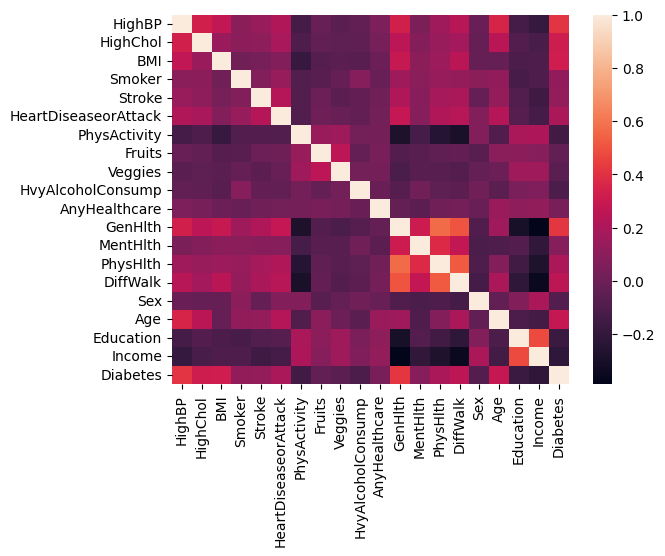

In [ ]:
df_train = pd.concat([X_train, y_train], axis = 1)
print("Training set correlation:")
print(df_train.corr())
sb.heatmap(df_train.corr())

In [ ]:
selectingFeature = SelectKBest(score_func = chi2, k = 15)
fit = selectingFeature.fit(X_train, y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(pd.DataFrame(X_train).columns)

scoreComparation = pd.concat([columns, scores], axis = 1)
scoreComparation.columns = ['feature', 'score']
scoreComparation = scoreComparation.sort_values(by= 'score', ascending = False)
scoreComparation

,feature,score
13,PhysHlth,38000.366093
12,MentHlth,6015.039082
2,BMI,5781.315365
16,Age,4074.116321
11,GenHlth,3705.996876
0,HighBP,3509.664822
14,DiffWalk,2485.829704
1,HighChol,2193.915446
18,Income,1991.779965
5,HeartDiseaseorAttack,1620.504304


### Remove Feature

In [ ]:
columns_to_remove = ['PhysActivity', 'Sex', 'Veggies', 'Fruits', 'AnyHealthcare']
X_train = X_train.drop(columns_to_remove, axis = 1)
X_test = X_test.drop(columns_to_remove, axis = 1)
X_val = X_val.drop(columns_to_remove, axis = 1)


### Scaling

In [ ]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Training Model

### Eksperimen Menentukan Model

Accuracy: 0.737989652623799
Precision: 0.30304182509505706
Recall: 0.7305224564619615
F1 score: 0.4283794678849772


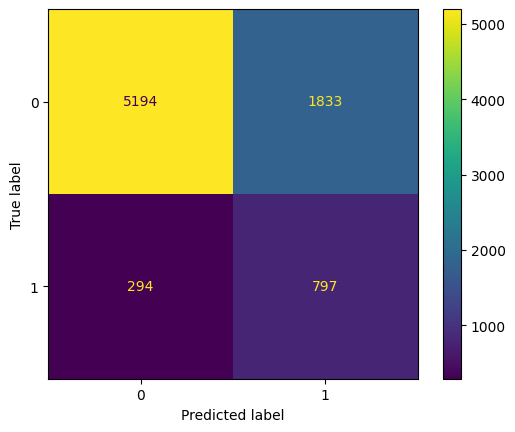

In [ ]:
model_baseline = LogisticRegression(max_iter=1000)

model_baseline.fit(X_train, y_train)
y_pred = model_baseline.predict(X_val)

print(f'Accuracy: {metrics.accuracy_score(y_val, y_pred)}')
print(f'Precision: {metrics.precision_score(y_val, y_pred)}')
print(f'Recall: {metrics.recall_score(y_val, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_val, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_val, y_pred)
).plot()

Accuracy: 0.7788864252278886
Precision: 0.30045351473922904
Recall: 0.4857928505957837
F1 score: 0.3712784588441332


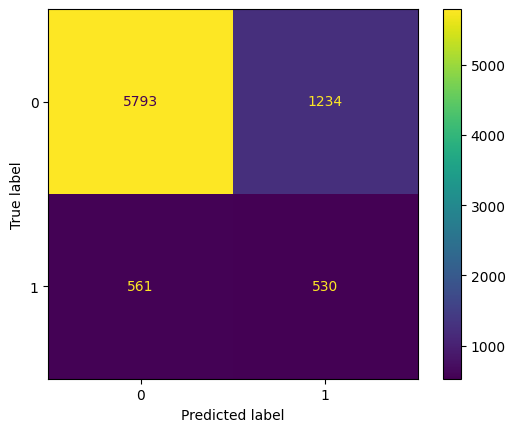

In [ ]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors=10)

model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_val)

print(f'Accuracy: {metrics.accuracy_score(y_val, y_pred)}')
print(f'Precision: {metrics.precision_score(y_val, y_pred)}')
print(f'Recall: {metrics.recall_score(y_val, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_val, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_val, y_pred)
).plot()

Accuracy: 0.852180339985218
Precision: 0.4014466546112116
Recall: 0.20348304307974335
F1 score: 0.27007299270072993


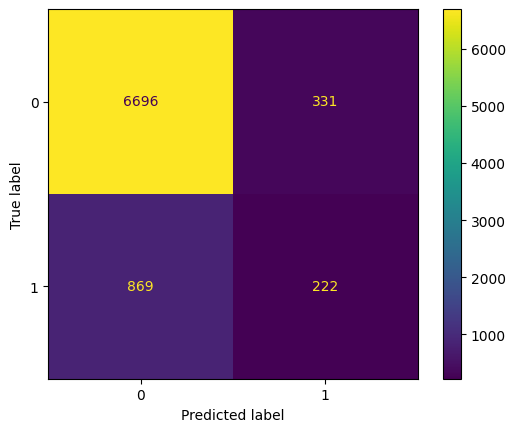

In [ ]:
model_randomforest = ensemble.RandomForestClassifier()

model_randomforest.fit(X_train, y_train)
y_pred = model_randomforest.predict(X_val)

print(f'Accuracy: {metrics.accuracy_score(y_val, y_pred)}')
print(f'Precision: {metrics.precision_score(y_val, y_pred)}')
print(f'Recall: {metrics.recall_score(y_val, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_val, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_val, y_pred)
).plot()

In [ ]:
estimators = [
    ('logreg', LogisticRegression(max_iter=100)),
    ('knn', neighbors.KNeighborsClassifier()),
    ('svc', svm.SVC())
]

model_stacking = ensemble.StackingClassifier(
    estimators = estimators,
    final_estimator= LogisticRegression()
)

model_stacking.fit(X_train, y_train)
y_pred = model_stacking.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_test, y_pred)
).plot()

### Eksperimen Menentukan Hyperparameter

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
params = {
    'C': [1, 10, 0.1],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs', 'newton-cg', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None]
}

model_logreg = LogisticRegression()

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

split_index = [-1 if x == y else 0 for x, y in zip(X_train_val.index, range(X_train_val.shape[0]))]

pds = PredefinedSplit(test_fold = split_index)

grid = GridSearchCV(model_logreg, params, scoring=metrics.make_scorer(metrics.f1_score, average='binary', pos_label=1), cv=pds)

grid.fit(X_train_val, y_train_val)

grid.cv_results_

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
48 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, i

{'mean_fit_time': array([0.00681186, 0.00392842, 1.10177922, 0.56027508, 1.53459024,
        0.89357615, 0.00806212, 0.0039413 , 0.0038867 , 0.00375748,
        0.00366473, 0.00373077, 0.05984879, 0.00398755, 1.30580664,
        0.58956122, 1.97763824, 1.048738  , 0.02295971, 0.04869056,
        0.00582123, 0.00397182, 0.00369382, 0.00787139, 0.00675702,
        0.00353193, 1.08076262, 0.56334639, 1.71379685, 0.94823599,
        0.0099473 , 0.00965261, 0.00700569, 0.05643749, 0.00378704,
        0.0042305 , 0.00414133, 0.00480318, 1.12546277, 0.59890604,
        1.78313732, 0.71104026, 0.01244235, 0.00437546, 0.00529385,
        0.00394964, 0.00422454, 0.04819012, 0.00383472, 0.00366998,
        0.82673836, 0.5644927 , 1.78679347, 0.7132709 , 0.0041039 ,
        0.00387454, 0.00384831, 0.00371575, 0.00371003, 0.00376701,
        0.00349426, 0.00344706, 1.09332848, 0.28063416, 2.22594261,
        0.91125417, 0.00494266, 0.00445127, 0.00425744, 0.01686406,
        0.00546336, 0.05959344]

In [ ]:
grid.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='saga')

Accuracy: 0.7305873078439101
Precision: 0.30787172011661806
Recall: 0.7457627118644068
F1 score: 0.43582335947172923


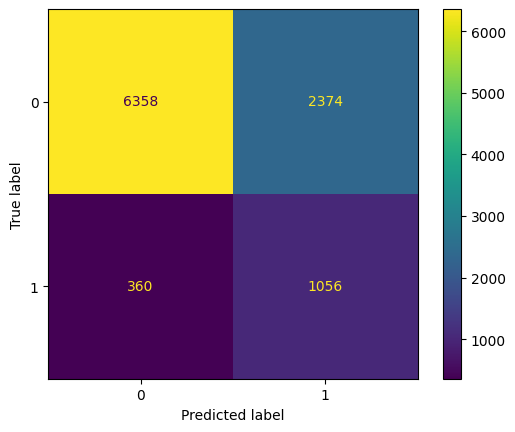

In [ ]:
model_best = grid.best_estimator_
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_test, y_pred)
).plot()

Ganti threshold ke angka yang lebih dari 0.5

In [ ]:
prob = model_best.predict_proba(X_val)

for threshold in [0.51, 0.52, 0.53, 0.54, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]:
    y_pred = [1 if x[1] > threshold else 0 for x in prob]
    print(f'Threshold: {threshold}')
    print(f'F1 score: {metrics.f1_score(y_val, y_pred)}')
    print()

Threshold: 0.51
F1 score: 0.43304061470911087

Threshold: 0.52
F1 score: 0.4358759430008382

Threshold: 0.53
F1 score: 0.44001139925904825

Threshold: 0.54
F1 score: 0.4425754060324826

Threshold: 0.55
F1 score: 0.4401885680612846

Threshold: 0.6
F1 score: 0.43798449612403106

Threshold: 0.65
F1 score: 0.4351918899348298

Threshold: 0.7
F1 score: 0.43121480289621883

Threshold: 0.75
F1 score: 0.41693218024578965

Threshold: 0.8
F1 score: 0.3829344432882414



Accuracy: 0.7520693732755223
Precision: 0.32177576150356446
Recall: 0.701271186440678
F1 score: 0.44113727232341177


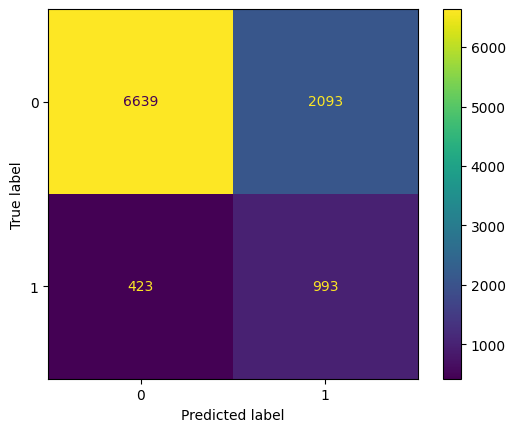

In [ ]:
prob = model_best.predict_proba(X_test)
y_pred = [1 if x[1] > 0.54 else 0 for x in prob]
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1 score: {metrics.f1_score(y_test, y_pred)}')

metrics.ConfusionMatrixDisplay(
    metrics.confusion_matrix(y_test, y_pred)
).plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=953d4bfd-e41a-4a68-802a-5c95219a44b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>